In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest ,chi2

In [ ]:
data =pd.read_csv('/content/cyber crime(2017-2020) (1).csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   S. No                                         156 non-null    object 
 1   Category                                      156 non-null    object 
 2   State/UT                                      156 non-null    object 
 3   Personal Revenge                              156 non-null    float64
 4   Anger                                         156 non-null    float64
 5   Fraud                                         155 non-null    float64
 6   Extortion                                     156 non-null    float64
 7   Causing Disrepute                             155 non-null    float64
 8   Prank                                         156 non-null    float64
 9   Sexual Exploitation                           156 non-null    flo

In [ ]:
data.describe()

,Personal Revenge,Anger,Fraud,Extortion,Causing Disrepute,Prank,Sexual Exploitation,Political Motives,Terrorist Activities (Total),Terrorist Activities - Terrorist Recruitment,...,Disrupt Public Service,Sale Purchase Illegal Drugs,Developing own Business,Spreading Piracy,Psycho or Pervert,Steal Information,Abetment to Suicide,Others,Total,Year
count,156.000000,156.000000,155.000000,156.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,157.000000
mean,78.826923,49.576923,1628.090323,119.961538,112.109677,43.384615,174.019231,19.788462,8.961538,0.346154,...,3.769231,0.865385,14.326923,16.942308,0.423077,3.480769,0.134615,482.769231,2762.019231,2018.496815
std,245.026902,147.462189,5083.530672,380.311738,338.906216,193.481497,519.774498,60.932539,30.706075,1.435287,...,12.771362,3.077675,40.864870,90.375649,2.094658,14.615710,0.728113,1496.216829,8406.686061,1.118746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000
25%,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.500000,2018.000000
50%,5.500000,3.500000,51.000000,10.500000,4.000000,1.000000,22.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.500000,233.500000,2018.000000
75%,27.250000,17.250000,502.500000,31.500000,37.500000,6.000000,70.000000,9.000000,1.000000,0.000000,...,1.000000,0.000000,6.250000,2.000000,0.000000,0.000000,0.000000,192.250000,1108.000000,2019.000000
max,1470.000000,822.000000,30142.000000,2440.000000,1874.000000,1385.000000,3293.000000,356.000000,199.000000,8.000000,...,92.000000,21.000000,210.000000,671.000000,17.000000,93.000000,5.000000,8814.000000,50035.000000,2020.000000


In [ ]:
row , col = data.shape
print(row,col)

157 26


In [ ]:
data.drop([29,37,38,68,76,77,78,117,116,108,146,155,156],axis=0,inplace=True)

In [ ]:
data['Index']=[i for i in range(144)]
data.set_index('Index',inplace=True)

<Axes: >

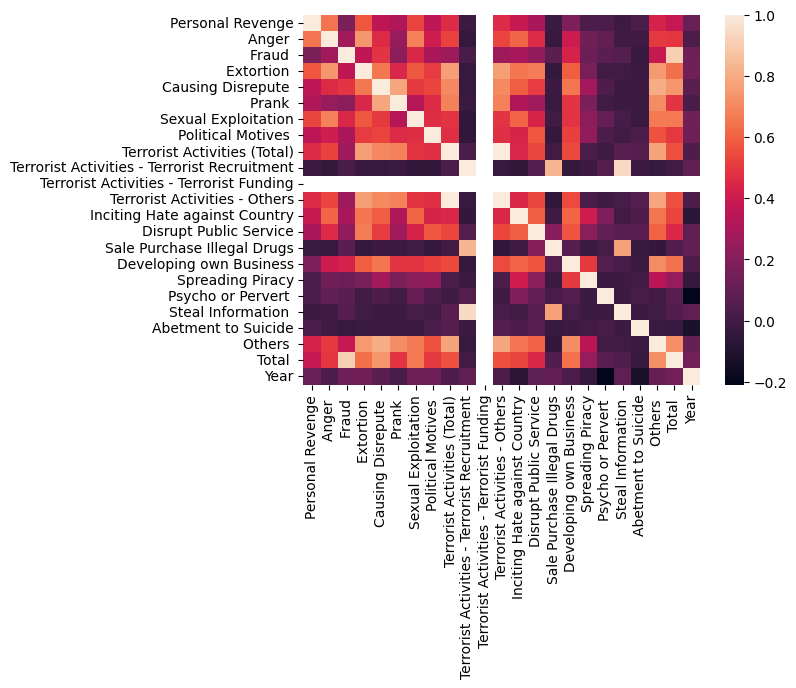

In [ ]:
nc=[]
num=[]
cat=[]
for i , (n,t) in enumerate(data.dtypes.items()):
  if t in ['int64','float64']:
    nc.append(i)
    num.append(n)
  else:
    cat.append(n)

sns.heatmap(data[num].corr())


<Axes: >

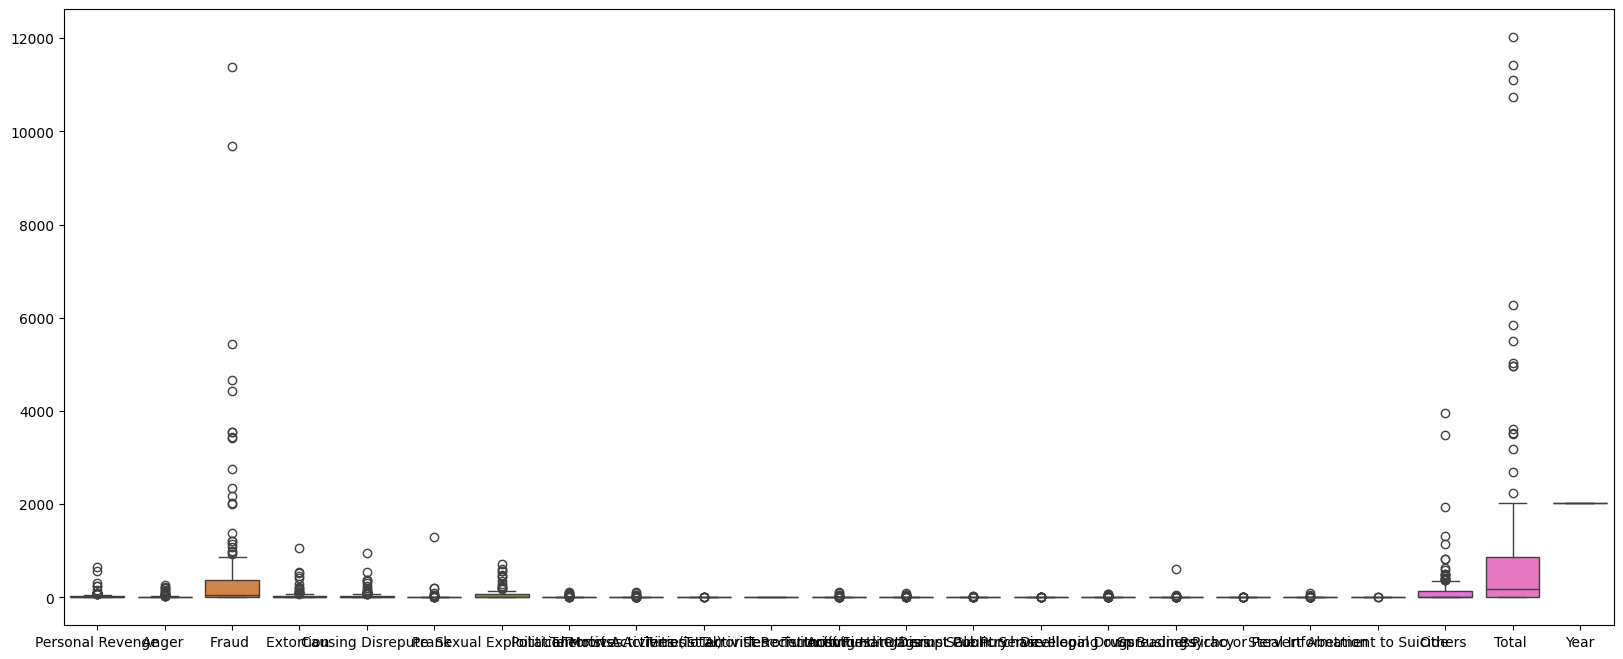

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.boxplot(data[num])

<Axes: xlabel='Personal Revenge', ylabel='Anger '>

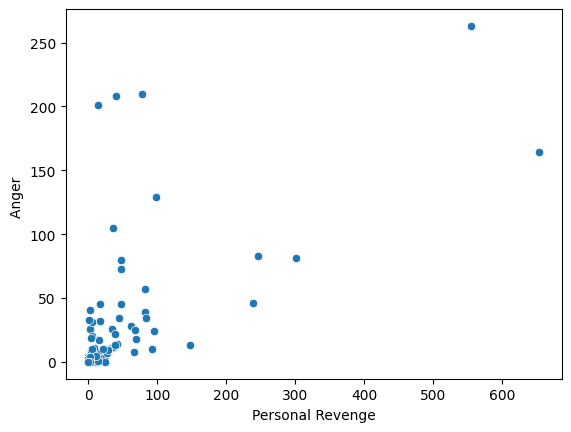

In [ ]:
sns.scatterplot(x=data[num[0]],y=data[num[1]])

In [ ]:
print(data.min(),data.quantile([0.25,0.5,0.75],numeric_only=True),data.max())

S. No                                                       1
Category                                                State
State/UT                                        A & N Islands
Personal Revenge                                          0.0
Anger                                                     0.0
Fraud                                                     0.0
Extortion                                                 0.0
Causing Disrepute                                         0.0
Prank                                                     0.0
Sexual Exploitation                                       0.0
Political Motives                                         0.0
Terrorist Activities (Total)                              0.0
Terrorist Activities - Terrorist Recruitment              0.0
Terrorist Activities - Terrorist Funding                  0.0
Terrorist Activities - Others                             0.0
Inciting Hate against Country                             0.0
Disrupt 

In [ ]:
data.isna().sum()

S. No                                           0
Category                                        0
State/UT                                        0
Personal Revenge                                0
Anger                                           0
Fraud                                           1
Extortion                                       0
Causing Disrepute                               1
Prank                                           0
Sexual Exploitation                             0
Political Motives                               0
Terrorist Activities (Total)                    0
Terrorist Activities - Terrorist Recruitment    0
Terrorist Activities - Terrorist Funding        0
Terrorist Activities - Others                   0
Inciting Hate against Country                   0
Disrupt Public Service                          0
Sale Purchase Illegal Drugs                     0
Developing own Business                         0
Spreading Piracy                                0


In [ ]:
k=0
for i in num:
  quartile=data[i].quantile([0.25,0.75])
  iqr=quartile[0.75]-quartile[0.25]
  for j in range(len(data)):
    if data.iloc[j,nc[k]]>quartile[0.75] +1.5*iqr or data.iloc[j,nc[k]]<quartile[0.25]-1.5*iqr:
      print(data.iloc[j,nc[k]])
  k+=1

246.0
62.0
239.0
69.0
93.0
99.0
555.0
68.0
301.0
83.0
654.0
84.0
147.0
83.0
96.0
78.0
66.0
83.0
80.0
201.0
208.0
46.0
32.0
129.0
73.0
41.0
263.0
45.0
45.0
81.0
39.0
164.0
34.0
31.0
34.0
105.0
33.0
57.0
210.0
2764.0
2171.0
3450.0
5441.0
1998.0
2351.0
1211.0
964.0
11381.0
3551.0
1000.0
938.0
2013.0
3549.0
1149.0
1218.0
1069.0
9680.0
3413.0
1380.0
4436.0
4674.0
95.0
419.0
153.0
97.0
224.0
199.0
518.0
109.0
279.0
544.0
447.0
102.0
74.0
175.0
112.0
115.0
1055.0
79.0
94.0
135.0
97.0
366.0
234.0
154.0
109.0
343.0
308.0
109.0
113.0
87.0
90.0
80.0
953.0
85.0
203.0
368.0
76.0
73.0
547.0
40.0
18.0
16.0
192.0
17.0
16.0
18.0
14.0
191.0
22.0
14.0
1293.0
35.0
12.0
43.0
32.0
11.0
87.0
217.0
462.0
724.0
343.0
289.0
557.0
430.0
169.0
483.0
191.0
612.0
239.0
192.0
560.0
16.0
20.0
14.0
23.0
22.0
18.0
20.0
52.0
14.0
45.0
88.0
16.0
16.0
50.0
90.0
67.0
24.0
18.0
108.0
73.0
8.0
44.0
3.0
2.0
2.0
7.0
1.0
1.0
20.0
13.0
9.0
1.0
4.0
12.0
1.0
16.0
1.0
3.0
3.0
1.0
2.0
54.0
4.0
1.0
7.0
3.0
21.0
2.0
106.0
1.0
2.0
7.0


In [ ]:
for i in num:
  data[i].fillna(data[i].mean(),inplace=True)
print(data.isna().sum())

S. No                                           0
Category                                        0
State/UT                                        0
Personal Revenge                                0
Anger                                           0
Fraud                                           0
Extortion                                       0
Causing Disrepute                               0
Prank                                           0
Sexual Exploitation                             0
Political Motives                               0
Terrorist Activities (Total)                    0
Terrorist Activities - Terrorist Recruitment    0
Terrorist Activities - Terrorist Funding        0
Terrorist Activities - Others                   0
Inciting Hate against Country                   0
Disrupt Public Service                          0
Sale Purchase Illegal Drugs                     0
Developing own Business                         0
Spreading Piracy                                0


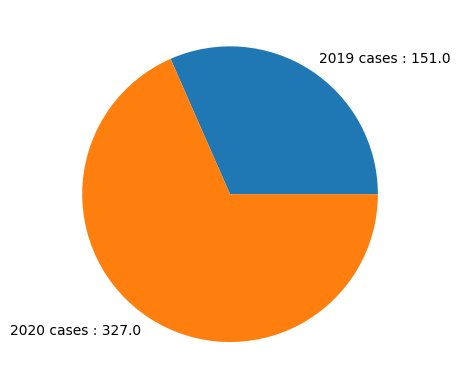

In [ ]:
counts={2019:0,2020:0}
for i in range(len(data)):
  if data.iloc[i,1]!='State':
    if data.iloc[i,25]==2019:
      counts[2019]+=data.iloc[i,24]
    elif data.iloc[i,25]==2020:
      counts[2020]+=data.iloc[i,24]

val=[];key=[]
for i in counts:
    key.append(i)
    val.append(counts[i])
plt.pie(val,labels=[f"{a} cases : {b}" for a,b in zip(key,val)])
plt.show()

In [ ]:
new=pd.get_dummies(data,columns=['Category','State/UT'])
print(new)
X=new.drop(columns=['S. No','Year'])
Y=new['Year']

l= LabelEncoder()
en_y=l.fit_transform(Y)

s=SelectKBest(score_func=chi2,k=3)
s.fit_transform(X,en_y)
Scores =pd.Series(s.scores_,index=X.columns)
print(Scores.nlargest(3))

      S. No  Personal Revenge  Anger       Fraud   Extortion   \
Index                                                           
0         1              24.0     5.0  585.734266        65.0   
1         2               0.0     0.0    0.000000         0.0   
2         3             246.0    83.0   48.000000        65.0   
3         4              12.0     5.0  397.000000         3.0   
4         5               8.0     3.0   47.000000         4.0   
...     ...               ...     ...         ...         ...   
139      32               2.0     4.0   23.000000        15.0   
140      33               3.0     4.0   33.000000         9.0   
141      34               0.0     0.0    0.000000         0.0   
142      35               2.0     0.0    0.000000         0.0   
143      36               0.0     0.0    4.000000         3.0   

       Causing Disrepute   Prank   Sexual Exploitation  Political Motives   \
Index                                                                       

In [ ]:
new['Bins']=pd.qcut(new['Total '],20)
means=new.groupby('Bins')['Total '].mean()
new['Total ']=new['Bins'].map(means)
new.drop(['Bins'],axis=1,inplace=True)

print(new['Total '].max())

8489.125


In [ ]:
tx,ttx,ty,tty=train_test_split(X,en_y,test_size=0.3)

print(tx,ttx,tty,ty)

       Personal Revenge  Anger   Fraud   Extortion   Causing Disrepute   \
Index                                                                     
85                  2.0     2.0   178.0        21.0               113.0   
46                 16.0     6.0   783.0        44.0                16.0   
43                  6.0     9.0   137.0        21.0                11.0   
25                  0.0     2.0     3.0         0.0                 0.0   
92                  4.0     8.0    81.0        23.0                21.0   
...                 ...     ...     ...         ...                 ...   
78                  5.0    20.0   363.0        17.0               308.0   
131                96.0    24.0  4436.0       115.0                 3.0   
77                  2.0     1.0     9.0         0.0                 2.0   
84                 68.0    25.0    67.0         6.0                28.0   
128                22.0    10.0   641.0        42.0                73.0   

       Prank   Sexual Ex

In [ ]:
m =MinMaxScaler()
new[num]=m.fit_transform(new[num])
print(new['Total '])

Index
18     0.0
68     0.0
103    0.0
32     0.0
129    0.0
      ... 
62     1.0
118    1.0
133    1.0
98     1.0
83     1.0
Name: Total , Length: 144, dtype: float64


In [ ]:
print(new['Total '][:50])

Index
18     0.000000
68     0.000000
103    0.000000
32     0.000000
129    0.000000
67     0.000000
34     0.000000
31     0.000000
1      0.000000
22     0.000000
141    0.000000
58     0.000000
54     0.000187
90     0.000187
101    0.000187
94     0.000187
104    0.000363
29     0.000363
142    0.000363
138    0.000363
106    0.000363
107    0.000363
87     0.000363
70     0.000363
35     0.000677
136    0.000677
53     0.000677
37     0.000677
25     0.000677
65     0.000677
73     0.001129
89     0.001129
125    0.001129
17     0.001129
143    0.001129
124    0.001129
5      0.001129
71     0.002091
77     0.002091
137    0.002091
61     0.002091
97     0.002091
102    0.002091
41     0.003824
51     0.003824
66     0.003824
109    0.003824
30     0.003824
132    0.003824
16     0.003824
Name: Total , dtype: float64


In [ ]:
for i in range(len(data)):
  if data.iloc[i,1]=='State' and data.iloc[i,25]==2020:
    print(data.iloc[i,2],data.iloc[i,24])


Andhra Pradesh 1899.0
Arunachal Pradesh 30.0
Assam 3530.0
Bihar 1512.0
Chhattisgarh 297.0
Goa 40.0
Gujarat 1283.0
Haryana 656.0
Himachal Pradesh 98.0
Jharkhand 1204.0
Karnataka 10741.0
Kerala 426.0
Madhya Pradesh 699.0
Maharashtra 5496.0
Manipur 79.0
Meghalaya 142.0
Mizoram 13.0
Nagaland 8.0
Odisha 1931.0
Punjab 378.0
Rajasthan 1354.0
Sikkim 0.0
Tamil Nadu 782.0
Telangana 5024.0
Tripura 34.0
Uttar Pradesh 11097.0
Uttarakhand 243.0
West Bengal 712.0
